<a href="https://colab.research.google.com/github/sonal-jatav/BikeSharingAssignment/blob/main/Sonal_Jatav_Bike_Sharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bike Sharing Assignment


### Objective:
Evaluate the features of bike sharing data of 2 years to derive different features that affect the demand for renting bikes

#### Problem Statement:

A bike sharing company that provides bikes on rent to customers wants to understand factors affecting demand pre-covid pandemic shutdown.
This would enable them to understand the demand dynamics of new market to deploy new strategies as per demand.

Depending on factors the company should be able to
1. Understand factors majorly affecting demand
2. Manipulate the strategies as per parameters driving demand

#### GOAL

**Derive appropriate features responsible for increase in `demand` as per the data** <br />
**Create a good model to understand `demand dynamics for new market`**

---
#### Steps
Since we want multiple feature determining relationship with demand/ count, it would require to apply multiple linear regression model
1. Understand Data
2. Data Analysis - Univariate, Bivariate, Multivariate
3. Preprocessing data <br />
    a. Handle missing values <br />
    b. Dummy variable creation/ encode categorical variables <br />
4. Split Data (train set, test set)
5. Scale numerical variables
6. Feature Selection (correlation matrix/ heatmap/ pairplot, RFE)
7. Modelling (Assess the model’s performance using metrics such as Mean Squared Error (MSE) and R-squared ( R^2 ))
8. Residual Analysis of the train data
9. Making Predictions
10. Model Evaluation

---

#### Import Libraries

In [23]:
#Load the necessary Libraries
import pandas as pd
import numpy as np

# Charts and plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Warnings library
import warnings #warning

warnings.filterwarnings('ignore')

#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## <font color="blue">Load Data</font>

In [24]:
# Load Data
bike_data = pd.read_csv('day.csv')

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## <font color="blue">Overview of Data</font>

In [25]:
# Overview of data
print('----------SHAPE-----------')
print(bike_data.shape)
print('\n\n ----------INFO (Data types, non null)-----------')
print(bike_data.info())
print('\n\n ---------DESCRIPTIVE STATISTICS------------')
print(bike_data.describe())
print('\n\n ---------CHECK NULL DATA------------')
print(bike_data.isnull().mean())
print('\n\n ---------CHECK UNIQUE DATA------------')
print(bike_data.nunique())

----------SHAPE-----------
(730, 16)


 ----------INFO (Data types, non null)-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

#### <font color="green">Convert `season` and `weathersit` to categorical string values</font>

**<font color="grey">Why?</font>**
<ol>
    <li> <i>season</i> & <i>weathersit</i> columns are encoded to numeric values which incorrectly suggest ordinality in the feature values
        <ol>
             <li> <i>season</i> values do not suggest Summer > Spring </li>
            <li> <i>weathersit</i> values do not suggest a day with Clear, Few clouds, Partly cloudy was better than Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
        </ol>
    </li>
    <li>Appropriate encoding: ML might treat the numbers as having some order leading to incorrect modelling assumptions resulting into biased conclusions. By converting to categorical string value and applying <i>One-hot encoding</i> will ensure that categories are treated as distinct unrelated values </li>
   <li>Appropriate encoding will ensure model correctly interprets categories and evaluate results with target value</li>
</ol>

In [26]:
# Convert season and weathersit to categorical string values
bike_data['season'].astype('str')
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['weathersit'].astype('str')
bike_data['weathersit'] = bike_data['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
# Define categorical and numerical columns

num_columns = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_columns = ['season', 'weathersit']

## <font color="blue">EDA Plots</font>

**Univariate, Bivariate, Multivariate graph plots**

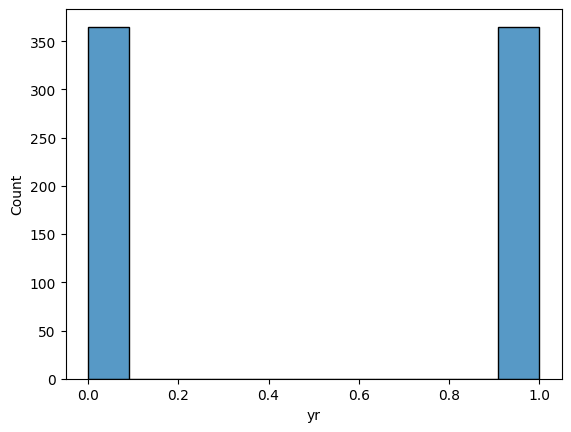

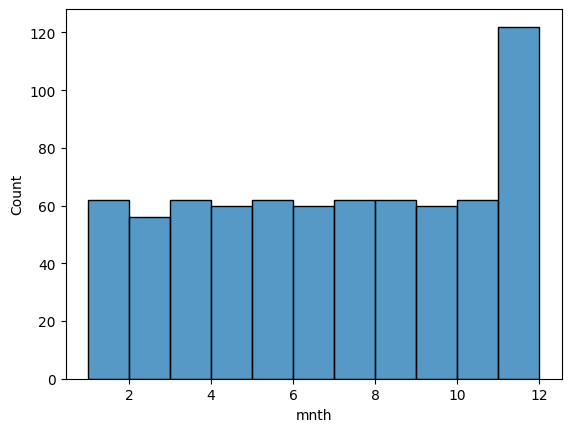

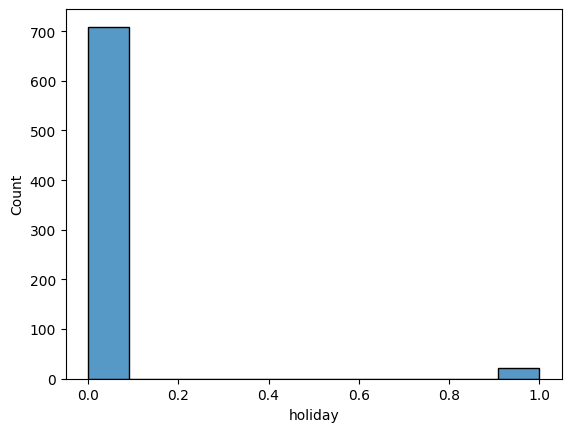

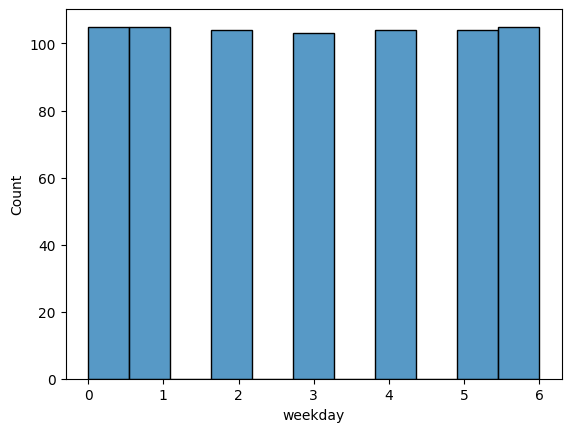

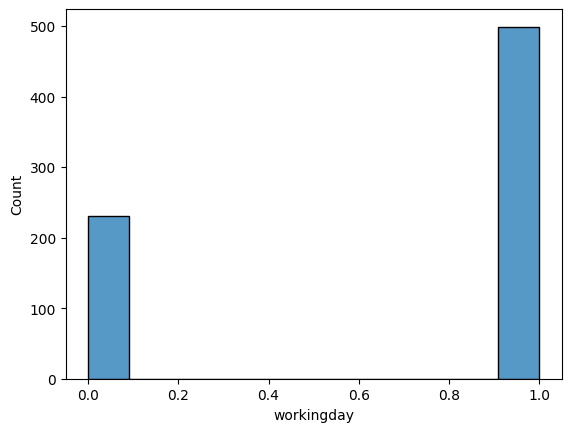

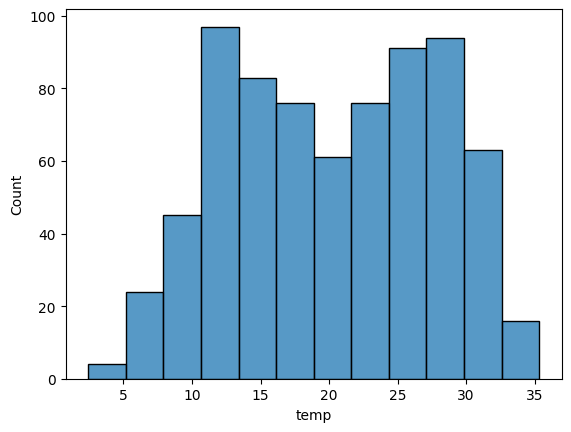

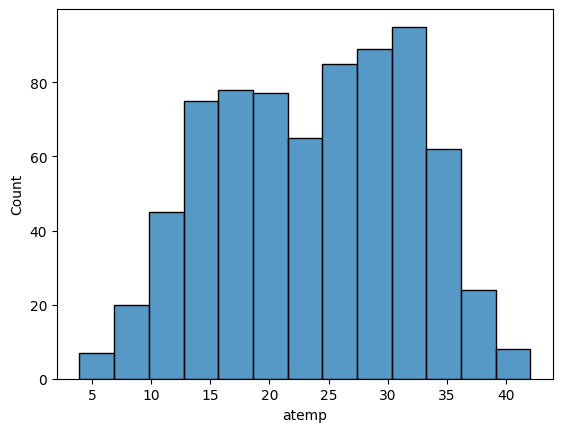

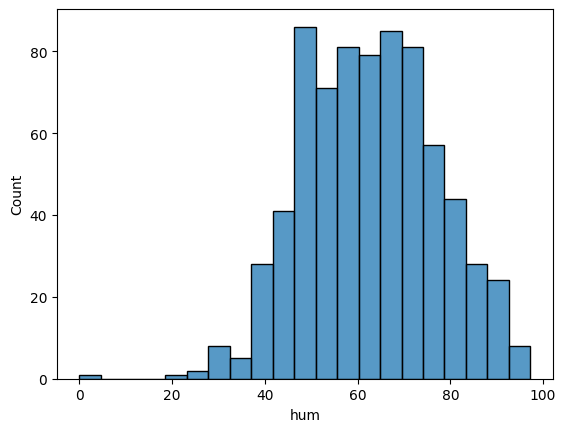

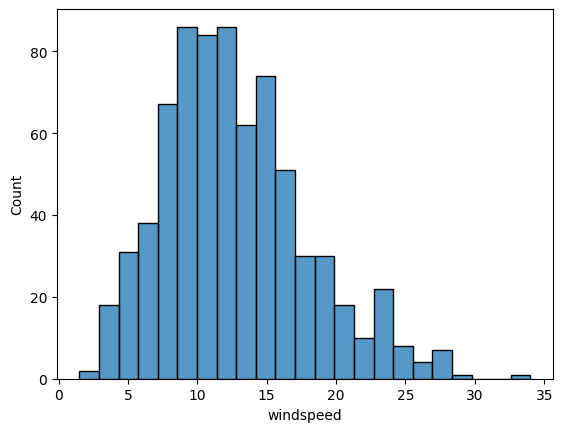

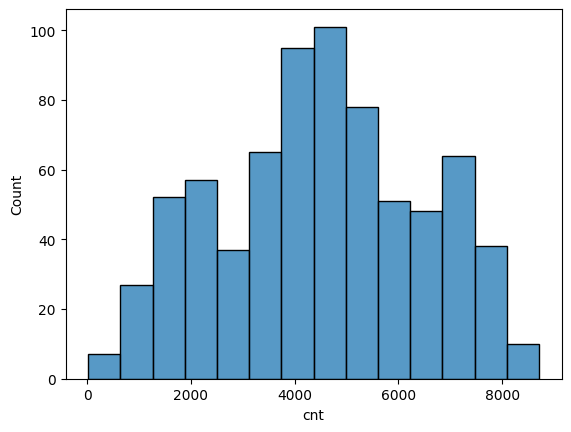

In [28]:
for columns in num_columns:
    sns.histplot(x=bike_data[columns])
    plt.show()

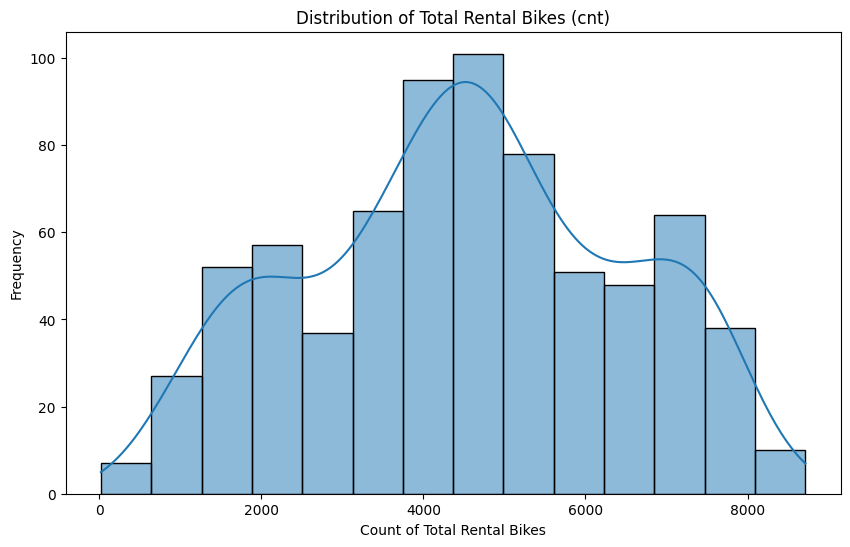

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['cnt'], kde=True)
plt.title('Distribution of Total Rental Bikes (cnt)')
plt.xlabel('Count of Total Rental Bikes')
plt.ylabel('Frequency')
plt.show()

In [30]:
import textwrap

# Bivariate analysis
color = sns.color_palette("Greens")[4]

for index, cols in enumerate(cat_columns):
    fig = px.box(bike_data, x=cols, y='cnt', title=cols + ' vs Count')
    fig.show()


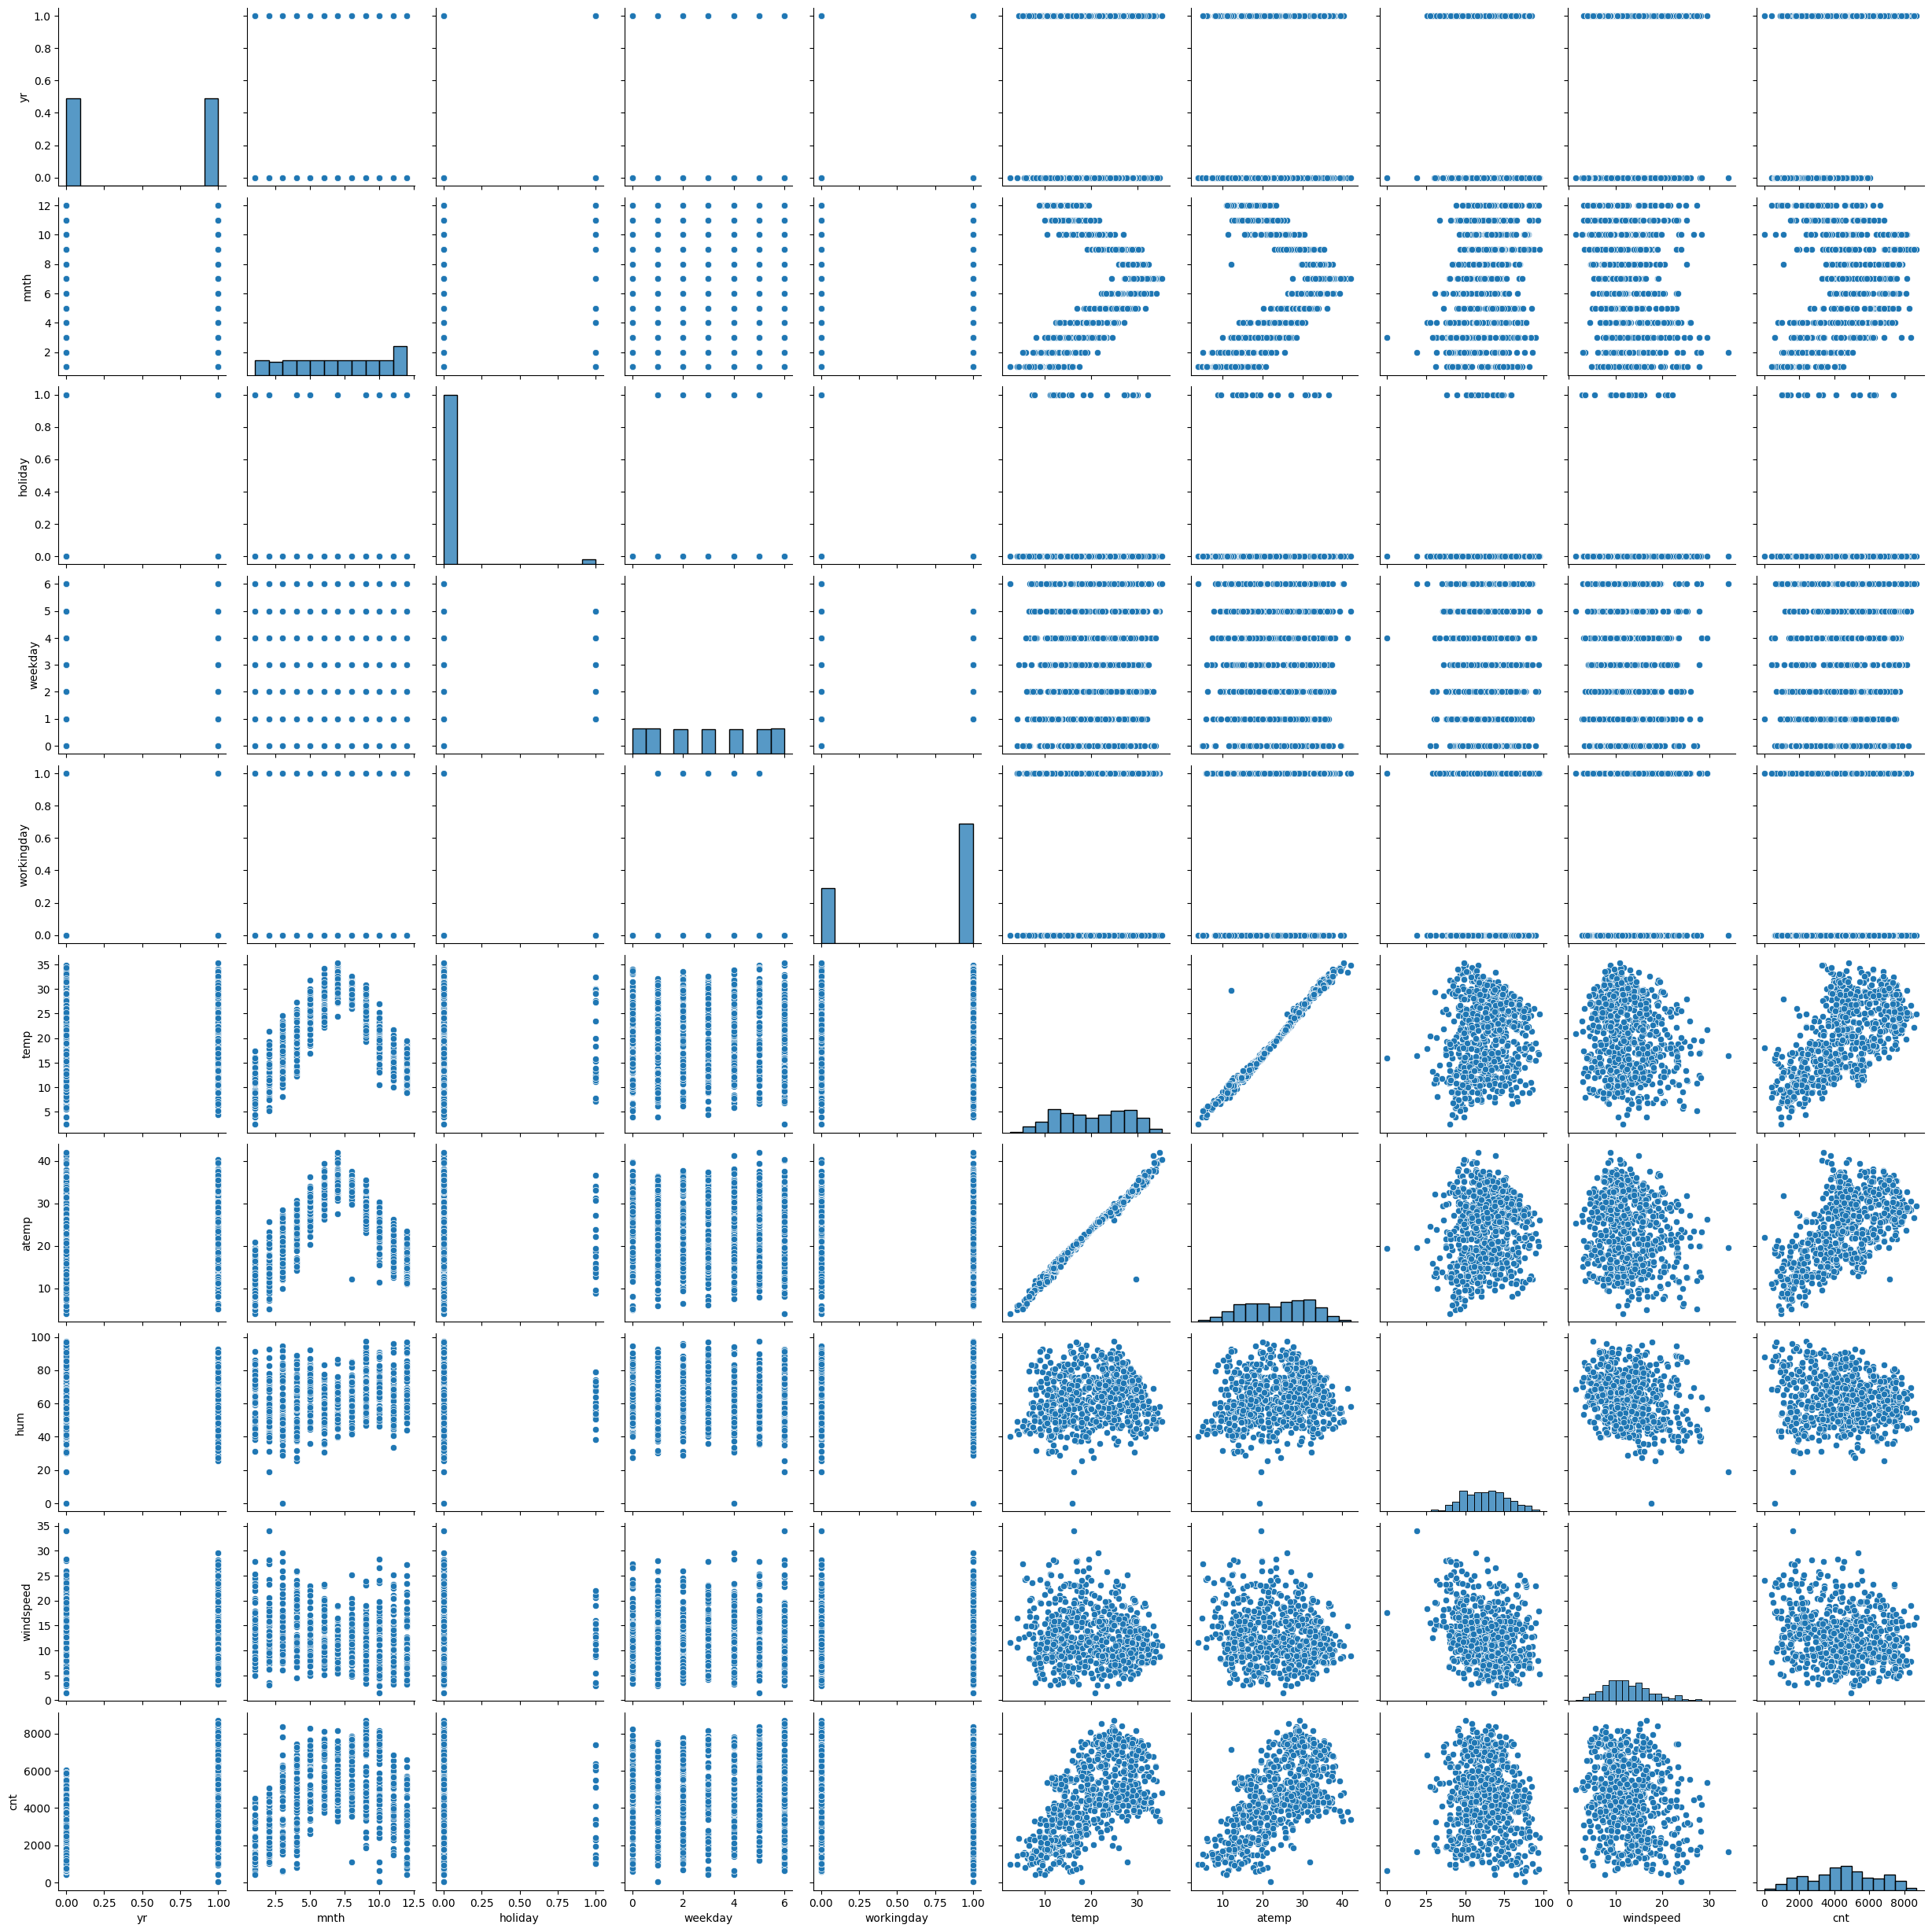

In [31]:
sns.pairplot(bike_data[num_columns])
plt.show()

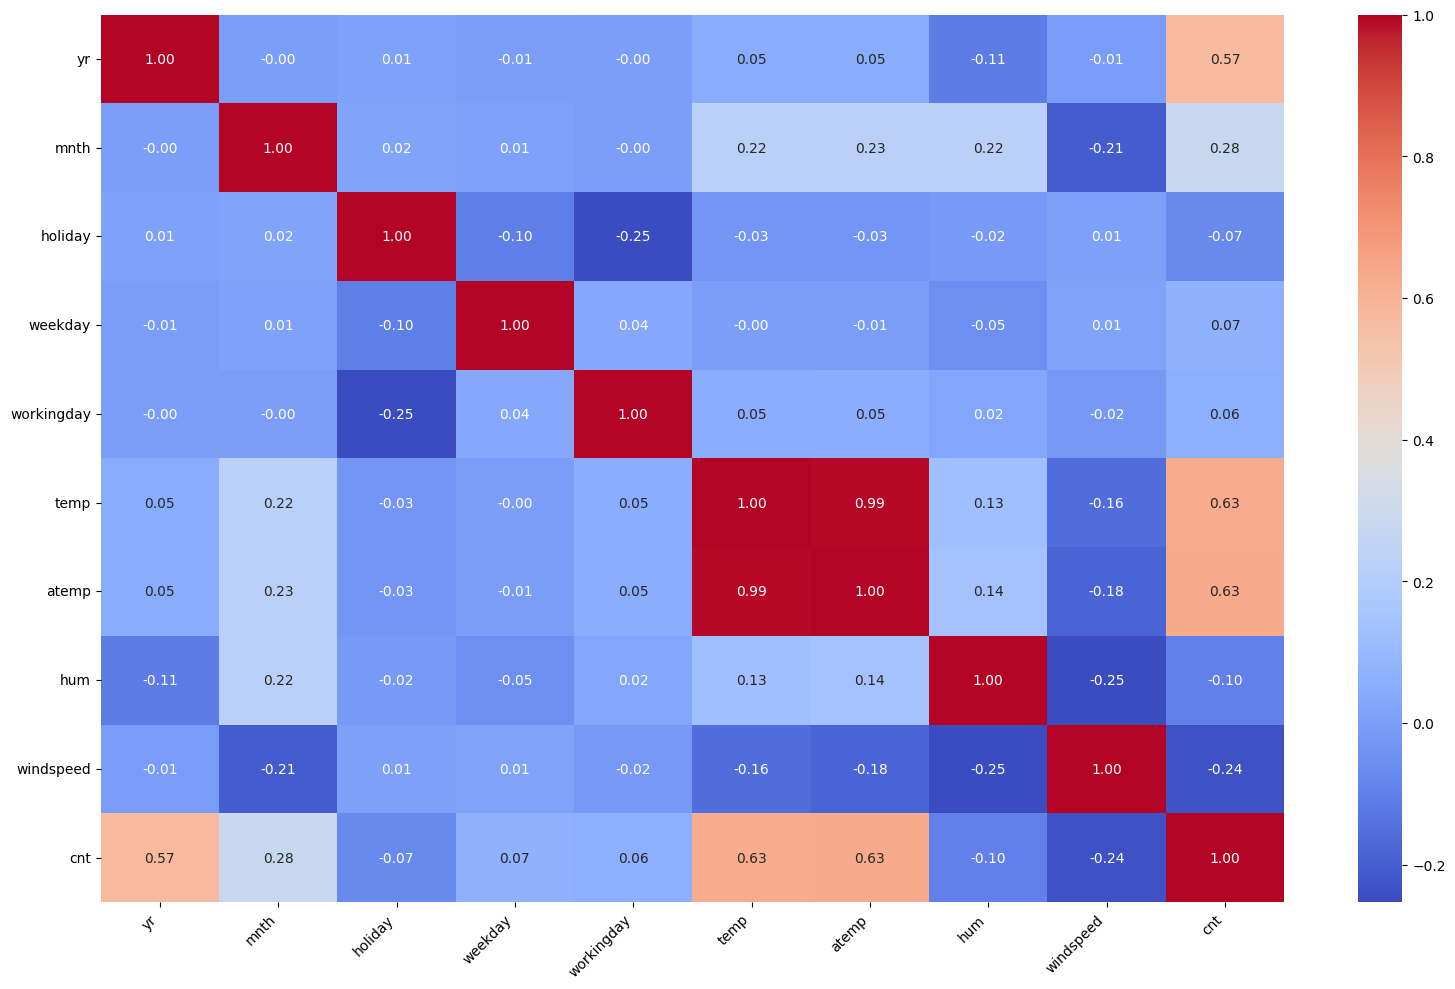

In [32]:
corr = bike_data[num_columns].corr()

# Plot the heatmap for all numeric columns
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 10}, cbar=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()  # Ensure everything fits into the figure area
plt.show()

## <font color="blue">Pre-processing Data</font>



In [33]:
# Drop columns `registered` and `casual` - Because their sum results in target variable cnt and can skew the model
bike_data = bike_data.drop(['registered', 'casual'], axis=1)

# Drop column `dteday` because mnth and yr already cover and date is not much relevant feature variable
bike_data = bike_data.drop(['dteday'], axis=1)

# Drop column `instant` because its just count of row
bike_data = bike_data.drop(['instant'], axis=1)

bike_data.shape

(730, 12)

In [34]:
# Check category columns for no. of categories each
bike_data[cat_columns].nunique()

season        4
weathersit    3
dtype: int64

In [35]:
# Create Dummy variable on categorical values - One-hot encoding
bike_data_dummies_season = pd.get_dummies(bike_data['season'], drop_first=True, dtype=int, prefix="season_")
bike_data_dummies_weathersit = pd.get_dummies(bike_data['weathersit'], drop_first=True, dtype=int, prefix="weathersit_")

In [36]:
# Append dummy feature columns to existing data
bike_data_append_dummies = pd.concat([bike_data, bike_data_dummies_season, bike_data_dummies_weathersit], axis=1)

# Check shape of data after appending
bike_data_append_dummies.shape

(730, 17)

In [37]:
# Drop the categorical variables from DF since it is no more required
bike_data_append_dummies = bike_data_append_dummies.drop(['season', 'weathersit'], axis=1)

# Check shape of data after dropping columns
bike_data_append_dummies.shape

(730, 15)

In [38]:
# Check if columns have appropriate datatypes
bike_data_append_dummies.dtypes

yr                                                                                                       int64
mnth                                                                                                     int64
holiday                                                                                                  int64
weekday                                                                                                  int64
workingday                                                                                               int64
temp                                                                                                   float64
atemp                                                                                                  float64
hum                                                                                                    float64
windspeed                                                                                              float64
c

## <font color="blue">Train Test Split</font>

**Split training and test data**

In [39]:
from sklearn.model_selection import train_test_split

# Define X(feature variables) and y(target variable)

bike_data_X = bike_data_append_dummies.drop(['cnt'], axis=1)

bike_data_y = bike_data_append_dummies['cnt']

In [40]:
# Split Train set and Test set
# Model is trained on training set and this model should be able to accurately predict the cnt in the test data.

bike_data_X_train, bike_data_X_test, bike_data_y_train, bike_data_y_test = \
    train_test_split(
        bike_data_X,
        bike_data_y,
        test_size=0.2,
        random_state=100)

In [41]:
# Check shape of train and test set data
print('Train X data shape -', bike_data_X_train.shape)
print('Train y data shape -', bike_data_y_train.shape)
print('\n\nTest X data shape -', bike_data_X_test.shape)
print('Test y data shape -', bike_data_y_test.shape)

Train X data shape - (584, 14)
Train y data shape - (584,)


Test X data shape - (146, 14)
Test y data shape - (146,)


## <font color="blue">Scaling data</font>

**Scaling data using Standardization**

In [42]:
from sklearn.preprocessing import StandardScaler

# Data Standardization
scaler = StandardScaler()

# fit & transform Training data
    # fit -> calculate mean & variance for features
    # transform -> transform all features with the calculated mean & variance
bike_data_X_train = scaler.fit_transform(bike_data_X_train)

# transform Test data
    # transform -> transform all features with the mean & variance calculated on train set
bike_data_X_test = scaler.transform(bike_data_X_test)

In [43]:
# Convert training and test features from numpy array to pandas dataframe

bike_data_X_train_df = pd.DataFrame(bike_data_X_train, columns=bike_data_X.columns)
bike_data_X_test_df = pd.DataFrame(bike_data_X_test, columns=bike_data_X.columns)


## <font color="blue">Feature Selection</font>

**Feature selection using RFE - Recursive feature elimination**

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=6)

In [45]:
# Recursively remove features to fit number of features selected i.e. 6

rfe = rfe.fit(bike_data_X_train_df, bike_data_y_train)

In [46]:
# Get list of selected features after RFE

selected_features = bike_data_X_train_df.columns[rfe.support_]

print(selected_features)

Index(['yr', 'temp', 'windspeed', 'season__spring',
       'weathersit__Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit__Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')


In [47]:
# Keep only selected features in training and test data

bike_data_X_train = bike_data_X_train_df[selected_features]
bike_data_X_test = bike_data_X_test_df[selected_features]

print('X training features shape -> ', bike_data_X_train.shape)
print('X test features shape -> ', bike_data_X_test.shape)

X training features shape ->  (584, 6)
X test features shape ->  (146, 6)


In [48]:
# Check missing values
print(bike_data_X_train_df.isnull().sum())
print(bike_data_X_test_df.isnull().sum())

# No Imputation required since dataset does not contain null values

yr                                                                                                     0
mnth                                                                                                   0
holiday                                                                                                0
weekday                                                                                                0
workingday                                                                                             0
temp                                                                                                   0
atemp                                                                                                  0
hum                                                                                                    0
windspeed                                                                                              0
season__spring                                         

## <font color="blue">Modelling</font>

In [49]:
import statsmodels.api as sm

In [50]:
# Create LR model 1 with all selected features on training set
bike_data_X_train_sm = sm.add_constant(bike_data_X_train)

# Apply OLS(Ordinary Least Square) method to estimate coefficients of model_1 by minimizing SSE(Sum of Squared Errors)
model_1 = sm.OLS(np.array(bike_data_y_train), bike_data_X_train_sm)

# Calculate all coefficients p-value, f-statistic, R^2, Adjusted R^2, SE, constants, etc.
result_1 = model_1.fit()

# Print summary of coefficients of the model_1
print(result_1.params)
result_1.summary()

const                                                                                                  4505.267123
yr                                                                                                     1012.307555
temp                                                                                                    724.225393
windspeed                                                                                              -227.046404
season__spring                                                                                         -617.227099
weathersit__Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -393.314518
weathersit__Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -300.052790
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     417.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.84e-206
Time:                        14:01:14   Log-Likelihood:                -4765.5
No. Observations:                 584   AIC:                             9545.
Df Residuals:                     577   BIC:                             9576.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                4505.2671     35.241    127.840      0.000    4436.050    4574.484
yr                                                                                                   1012.3076     35.383     28.610      0.000     942.812    1081.803
temp                                                                                                  724.2254     45.816     15.807      0.000     634.238     814.213
windspeed                                                                                            -227.0464     36.216     -6.269      0.000    -298.178    -155.915
season__spring                                                                                       -617.2271     45.622    -13.529      0.000    -706.833    -527.621
weathersit__Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -393.3145     35.853    -10.970      0.000    -463.734    -322.896
weathersit__Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -300.0528     35.739     -8.396      0.000    -370.248    -229.858
==============================================================================
Omnibus:                       72.346   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.246
Skew:                          -0.676   Prob(JB):                     1.31e-36
Kurtosis:                       5.228   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color="green">Inference</font>

<h4>Model_1 after applying OLS model</h4>
<br/>
<ul>
    <li><b>Null Hypothesis:</b> There is no linear relationship between x & y</li>
    <li><b>Alternate Hypothesis:</b> There is a significant linear relationship between x & y</li>
</ul>

<h5>
    <font color="green">Following parameters results in rejecting the Null Hypothesis <br/> <br/> </font>
    <font color="olive">Therefore proving that there is significant linear relationship between independent and dependent variables</font>
</h5>
<ol>
    <li>R-sqaured and Adjusted R-squared: 0.813 and 0.811 are near about same. 81% of variance is explained in the model</li>    
    <li>t-value, p-value: Higher t-value with 0 p-value the model is significant</li>
    <li>Prob(F-statistic): Very close to 0 therefore model is significant</li>
    <li>AIC & BIC: Has higher values which means model is better</li>
</ol>
<br />
<font color="purple"><b>RFE:</b> Recursive feature elimination</font>
<ol>
    <li>n_features_to_select=6: Results in best fit model with no multicollinearity between feature variables</li>    
    <li>n_features_to_select=8: Results in multicollinearity between feature variables and requires Manual feature removal due to high VIF</li>
</ol>

---

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Check and eliminate multicollinearity from the LR Model

vif = pd.DataFrame()

vif['Features'] = bike_data_X_train_sm.columns

vif['VIF'] = [variance_inflation_factor(bike_data_X_train_sm.values, i) for i in range(len(bike_data_X_train_sm.columns))]

print(vif)

                                            Features       VIF
0                                              const  1.000000
1                                                 yr  1.008062
2                                               temp  1.690196
3                                          windspeed  1.056074
4                                     season__spring  1.675886
5  weathersit__Light Snow, Light Rain + Thunderst...  1.035032
6  weathersit__Mist + Cloudy, Mist + Broken cloud...  1.028453


## <font color="blue">Residual Analysis of the train data</font>

**Check error terms are normally distributed (Check assumption of linear regression, error terms should be normally distributed)**

In [53]:
# Predict the count from the model

bike_data_y_train_pred = result_1.predict(bike_data_X_train_sm)

Text(0.5, 0, 'Errors')

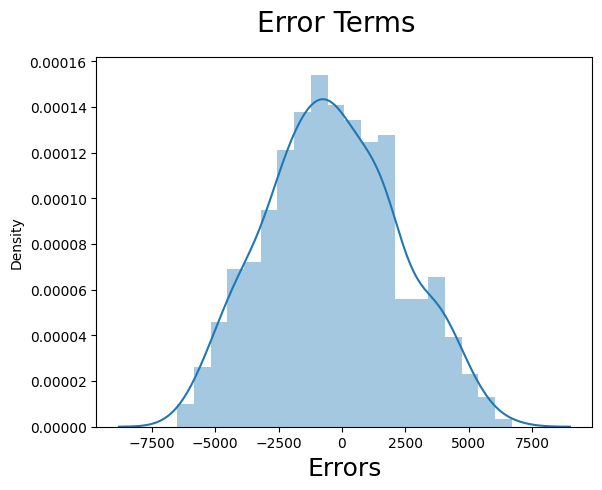

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((bike_data_y_train - bike_data_y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

## <font color="blue">Making Predictions</font>

****

In [55]:
# Make predictions using the test set

bike_data_X_test_sm = sm.add_constant(bike_data_X_test)

bike_data_y_test_pred = result_1.predict(bike_data_X_test_sm)

Text(0, 0.5, 'y_pred')

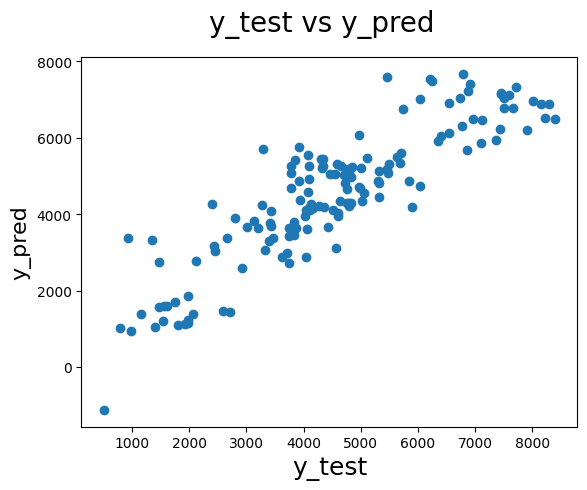

In [56]:
# Scatter plot for y_test vs y_test_predict
fig = plt.figure()
plt.scatter(bike_data_y_test, bike_data_y_test_pred, linewidths=1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)


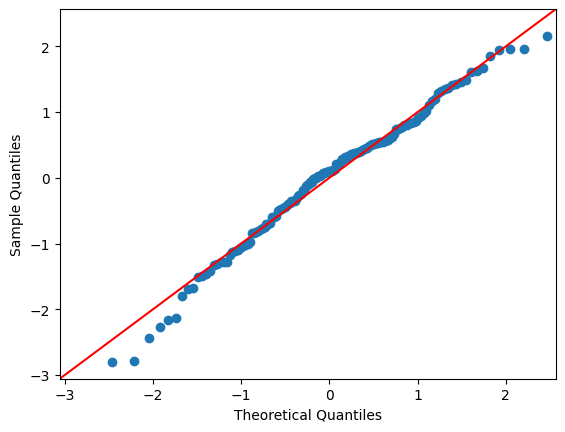

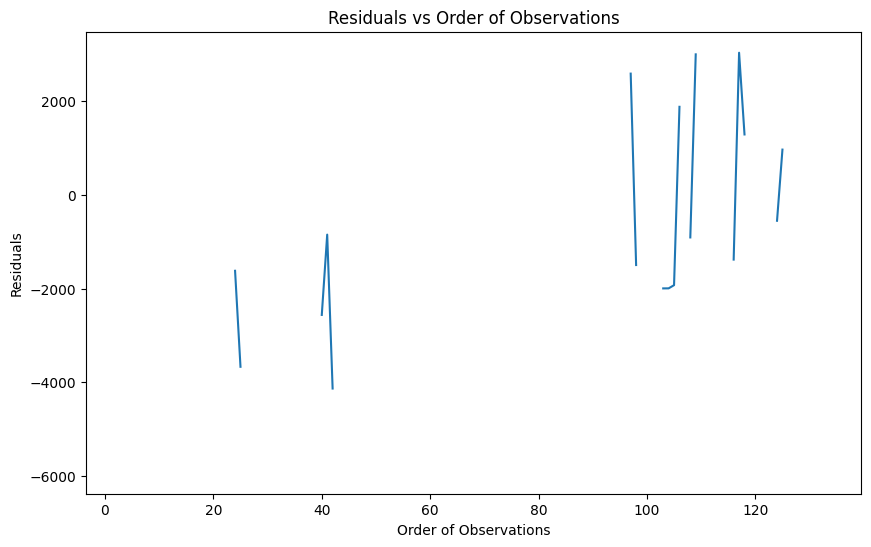

In [57]:
# Plot the qq-plot of the error terms
y_train_data_qq = np.array(bike_data_y_test) - np.array(bike_data_y_test_pred)
sm.qqplot(y_train_data_qq, fit=True, line='45')
plt.show()

residuals = bike_data_y_test - bike_data_y_test_pred

# Residuals vs Order of Observations
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals vs Order of Observations')
plt.xlabel('Order of Observations')
plt.ylabel('Residuals')
plt.show()


## <font color="green">Inference</font>

<h4>Assumptions of Linear Regression</h4>
<ol>
    <li><b>Linearity:</b> The scatter plots of each independent variable against the dependent variable (cnt) show a linear relationship.</li>
	<li><b>Independence:</b> The plot of residuals over the order of observations does not show any clear pattern. This indicates that the residuals are independent.</li>
	<li><b>Homoscedasticity:</b> The scatter plot of residuals against the predicted values show no pattern (constant variance).</li>
	<li><b>Normality:</b> The Q-Q (Quantile Quantile) plot show the residuals falling approximately along the 45-degree line, indicating that the residuals are normally distributed. The histogram show normal distribution.</li>
</ol>

## <font color="blue">R2 Score</font>

****

In [58]:
from sklearn.metrics import r2_score

# R2 Score of training data
r2_train = r2_score(bike_data_y_train, bike_data_y_train_pred)
print('\x1b[34mR2 Score of training data -> ', r2_train)

# R2 Score of test data
r2_test = r2_score(bike_data_y_test, bike_data_y_test_pred)
print('R2 Score of test data -> ', r2_test)


# Difference of R2 Score of training and test data
difference = r2_train - r2_test
print('Difference of R2 Score of training and test data -> ', difference)

R2 Score of training data ->  0.8128771834864366
R2 Score of test data ->  0.7749430671522142
Difference of R2 Score of training and test data ->  0.03793411633422239


## <font color="green">Inference</font>

<h4>Train set vs Test set</h4>
<table align="left" >
    <thead>
        <tr>
        <td><b>Train set</b></td>
        <td><b>Test set</b></td>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td>R2 score: 0.813</td>
            <td>R2 score: 0.775</td>
        </tr>
        <tr>
            <td colspan=2>**Difference of R2 Score of training and test data =  0.038**</td>
        </tr>
        <tr>
            <td colspan=2>The r2 scores for training and test data are near about the same</td>
        </tr>
    </tbody>
</table>




## <font color="Purple">Conclusions</font>

<ul>
    <li><b>Demand of bikes depend on following features:</b>
<br/>year
<br/>temperature
<br/>windspeed
<br/>season__spring
<br/>weathersit__Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br/>weathersit__Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
    <li><b>How well those variables describe the bike demands:</b>
        <br />Bike demand counts are lower in case of weather with Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        <br /> Bike demand counts are higher at higher temperature
        <br /> Bike demand counts are lower in spring
        <br /> Bike demand counts are lower in case of weather with Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
</li>
</ul>

## <font color="Purple">Recommendations</font>

<ul>
    <li>Cloudy, Misty, rainy kind of weathers since travelling by bikes can become a hastle for the customers so they can even allow overnight charges discount and call for help/ pick drop features</li>
    <li>During higher temperatures operations should be ramped up to keep up with the demand</li>
    <li>During lower or pleasant temperatures more marketing campaigns can be targetted to drive more customers to use bikes</li>
    <li>Since spring is usually holiday season better sales model like rent a bike for city tour or tour to nearby holiday spots or overnight rentals can be promoted</li>
</ul>